In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans


#Методы кластеризации и оценка качества кластеризации

Загрузите набор данных из файла cluster datasets в соответствии с вашим вариантом (если считаете, что набор данных не представляет необходимой информации или сложен для интерперетации или, то можно выбрать другой - но **необходимо предварительное согласование**).

Перевыбрал на 5ый датасет (Youtube)

In [2]:
df = pd.read_csv("GYS.csv", encoding='unicode_escape')
display(df)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


Используйте представленные в практике методы кластеризации (помните, что кластеры строятся по классам).

Несколько правил перед выполнением задания:
0. Внимательно изучить практику 4!
1. Служебные комментарии читать внимательно и не удалять
2. Выполнить до 10-11-2023 (но не затягивать, таск не простой!)


P.S. Мгномерные данные - данные, в которых количество колонок > 3

P.S.S. Служебные комментарии - ячейки с описанием задачи в """ task description """



In [3]:
"""
Предварительно - оптимизируйте ваш набор данных.
1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)
2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)
3. Скопируйте df в df_cluster # df_cluster = df.copy()
далее вы работаете с ним
4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные
5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки
"""

'\nПредварительно - оптимизируйте ваш набор данных.\n1. Удалить лишние колонки (порядковые признаки, с множеством пропусков, с кучей выбросов, ....)\n2. Обработайте выбросы и пропуски (Для удобства - ваш коллега сделал библиотеку в pypi для анализа выбросов - подробности уточняйте в группе)\n3. Скопируйте df в df_cluster # df_cluster = df.copy()\nдалее вы работаете с ним\n4. Выполните масштабирование числовых признаков StandatdScaler || MinMaxScaler, в df_cluser замените числовые признаки на отмасштабированные\n5. Для кагегориальных значений используйте LabelEncoder - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html. В df_cluster замените на encoded признаки\n'

In [4]:
# your_code here
df = df.drop(["rank", "Abbreviation"], axis=1)
df = df.dropna()
df

,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,country_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,Music,1.0,1.0,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
2,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,Entertainment,48.0,1.0,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.0,2.0,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,Entertainment,3.0,2.0,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
8,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,People,630.0,5.0,...,100000.0,2016.0,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Migos ATL,12400000,6.993406e+09,Music,Migos ATL,99,United States,Entertainment,833.0,175.0,...,100000.0,2012.0,Jan,17.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
990,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525.0,55.0,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,Games,6141.0,125.0,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
993,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,Games,35112.0,4.0,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


In [5]:
df.describe(include='all')

,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,country_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,554,5.540000e+02,5.540000e+02,554,554,554.000000,554,554,5.540000e+02,554.000000,...,5.540000e+02,554.000000,554,554.000000,554.000000,5.540000e+02,554.000000,5.540000e+02,554.000000,554.000000
unique,554,NaN,NaN,17,552,NaN,42,14,NaN,NaN,...,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,T-Series,NaN,NaN,Entertainment,Like Nastya Vlog,NaN,United States,Entertainment,NaN,NaN,...,NaN,NaN,Jan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,145,2,NaN,179,181,NaN,NaN,...,NaN,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.462401e+07,1.310608e+10,NaN,NaN,14758.036101,NaN,NaN,1.297121e+05,180.850181,...,3.431256e+05,2012.492780,NaN,15.259928,60.533574,4.965559e+08,8.866029,2.402031e+08,25.887766,-5.850585
std,NaN,1.950924e+07,1.729334e+10,NaN,NaN,44248.913413,NaN,NaN,6.815954e+05,732.093496,...,5.881429e+05,4.468591,NaN,8.771828,26.365440,5.178813e+08,4.813768,1.641213e+08,20.251021,84.737945
min,NaN,1.230000e+07,2.634000e+03,NaN,NaN,1.000000,NaN,NaN,1.000000e+00,1.000000,...,1.000000e+00,1970.000000,NaN,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,NaN,1.490000e+07,5.102920e+09,NaN,NaN,436.500000,NaN,NaN,2.222500e+02,10.000000,...,1.000000e+05,2009.000000,NaN,8.000000,28.100000,1.023202e+08,5.360000,5.770569e+07,20.593684,-95.712891
50%,NaN,1.880000e+07,9.040989e+09,NaN,NaN,1278.000000,NaN,NaN,5.695000e+02,40.500000,...,2.000000e+05,2013.000000,NaN,15.000000,60.000000,3.282395e+08,5.560000,2.706630e+08,29.843491,-3.435973
75%,NaN,2.670000e+07,1.540470e+10,NaN,NaN,4142.500000,NaN,NaN,1.580500e+03,104.750000,...,4.000000e+05,2015.750000,NaN,22.000000,88.200000,1.366418e+09,14.700000,4.710315e+08,37.090240,78.962880


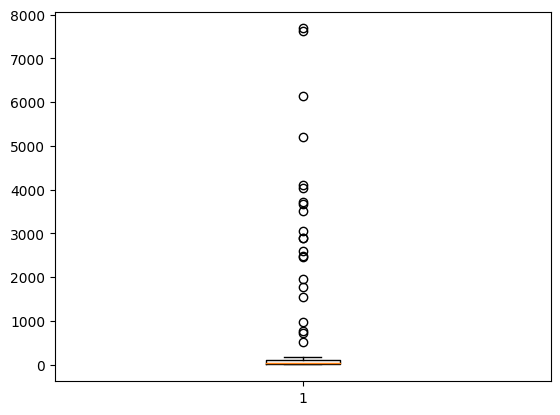

In [6]:
import matplotlib.pyplot as plt
plt.boxplot(df['country_rank'])
plt.show()

In [7]:
df_cluster = df.copy()

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [9]:
num_cols = df.select_dtypes(include=['int', 'float']).columns
num_cols

Index(['subscribers', 'video views', 'uploads', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'video_views_for_the_last_30_days',
       'lowest_monthly_earnings', 'highest_monthly_earnings',
       'lowest_yearly_earnings', 'highest_yearly_earnings',
       'subscribers_for_last_30_days', 'created_year', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')

In [10]:
standard_scaler = StandardScaler()
df_std_scaled = df.copy()
df_std_scaled[num_cols] = standard_scaler.fit_transform(df[num_cols])

In [11]:
df_cluster[num_cols] = df_std_scaled[num_cols]
df_cluster

,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,country_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,T-Series,11.306187,12.437626,Music,T-Series,0.120427,India,Music,-0.190477,-0.245888,...,2.819675,-1.454295,Mar,-0.257868,-1.231267,1.681173,-0.728992,1.407721,-0.261659,1.001796
2,MrBeast,7.253165,0.883378,Entertainment,MrBeast,-0.317063,United States,Entertainment,-0.190408,-0.245888,...,13.030498,-0.110376,Feb,0.540863,1.050293,-0.325303,1.213030,0.185762,0.553681,-1.061431
3,Cocomelon - Nursery Rhymes,7.047948,8.733435,Education,Cocomelon - Nursery Rhymes,-0.311974,United States,Education,-0.190476,-0.244520,...,1.117871,-1.454295,Sep,-1.627120,1.050293,-0.325303,1.213030,0.185762,0.553681,-1.061431
4,SET India,6.894036,7.807387,Shows,SET India,2.302202,India,Entertainment,-0.190474,-0.244520,...,1.117871,-1.454295,Sep,0.540863,-1.231267,1.681173,-0.728992,1.407721,-0.261659,1.001796
8,Like Nastya,4.174920,4.478192,People & Blogs,Like Nastya Vlog,-0.322673,Russia,People,-0.189553,-0.240419,...,-0.413752,0.785570,Jan,-0.143763,0.811128,-0.680659,-0.889094,-0.808177,1.761316,1.313105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Migos ATL,-0.627141,-0.353789,Music,Migos ATL,-0.331585,United States,Entertainment,-0.189255,-0.007998,...,-0.413752,-0.110376,Jan,0.198550,1.050293,-0.325303,1.213030,0.185762,0.553681,-1.061431
990,Natan por Aï¿,-0.632272,-0.235938,Sports,Natan por Aï¿,-0.306681,Brazil,Entertainment,-0.189708,-0.172060,...,0.607330,1.009556,Feb,-0.371972,-0.350532,-0.548877,0.668266,-0.347383,-1.983062,-0.544223
991,Free Fire India Official,-0.632272,-0.661642,People & Blogs,Free Fire India Official,-0.299895,India,Games,-0.181461,-0.076357,...,-0.073391,1.233543,Sep,-0.143763,-1.231267,1.681173,-0.728992,1.407721,-0.261659,1.001796
993,RobTopGames,-0.632272,-0.736900,Gaming,RobTopGames,-0.332942,Sweden,Games,-0.138918,-0.241786,...,-0.413752,-0.110376,May,-0.714285,0.245483,-0.939810,-0.496116,-1.409877,1.692327,0.289318


In [12]:
lab_col = df.select_dtypes(include=['object']).columns
lab_col

Index(['Youtuber', 'category', 'Title', 'Country', 'channel_type',
       'created_month'],
      dtype='object')

In [13]:
lab_col = ['category', 'Country', 'channel_type']

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for label in lab_col:
  le.fit(df_cluster[label])
  df_cluster[label] = le.transform(df_cluster[label])

df_cluster

,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,country_rank,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,T-Series,11.306187,12.437626,8,T-Series,0.120427,14,8,-0.190477,-0.245888,...,2.819675,-1.454295,Mar,-0.257868,-1.231267,1.681173,-0.728992,1.407721,-0.261659,1.001796
2,MrBeast,7.253165,0.883378,3,MrBeast,-0.317063,39,4,-0.190408,-0.245888,...,13.030498,-0.110376,Feb,0.540863,1.050293,-0.325303,1.213030,0.185762,0.553681,-1.061431
3,Cocomelon - Nursery Rhymes,7.047948,8.733435,2,Cocomelon - Nursery Rhymes,-0.311974,39,3,-0.190476,-0.244520,...,1.117871,-1.454295,Sep,-1.627120,1.050293,-0.325303,1.213030,0.185762,0.553681,-1.061431
4,SET India,6.894036,7.807387,14,SET India,2.302202,14,4,-0.190474,-0.244520,...,1.117871,-1.454295,Sep,0.540863,-1.231267,1.681173,-0.728992,1.407721,-0.261659,1.001796
8,Like Nastya,4.174920,4.478192,11,Like Nastya Vlog,-0.322673,26,11,-0.189553,-0.240419,...,-0.413752,0.785570,Jan,-0.143763,0.811128,-0.680659,-0.889094,-0.808177,1.761316,1.313105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,Migos ATL,-0.627141,-0.353789,8,Migos ATL,-0.331585,39,4,-0.189255,-0.007998,...,-0.413752,-0.110376,Jan,0.198550,1.050293,-0.325303,1.213030,0.185762,0.553681,-1.061431
990,Natan por Aï¿,-0.632272,-0.235938,15,Natan por Aï¿,-0.306681,3,4,-0.189708,-0.172060,...,0.607330,1.009556,Feb,-0.371972,-0.350532,-0.548877,0.668266,-0.347383,-1.983062,-0.544223
991,Free Fire India Official,-0.632272,-0.661642,11,Free Fire India Official,-0.299895,14,6,-0.181461,-0.076357,...,-0.073391,1.233543,Sep,-0.143763,-1.231267,1.681173,-0.728992,1.407721,-0.261659,1.001796
993,RobTopGames,-0.632272,-0.736900,5,RobTopGames,-0.332942,32,6,-0.138918,-0.241786,...,-0.413752,-0.110376,May,-0.714285,0.245483,-0.939810,-0.496116,-1.409877,1.692327,0.289318


In [15]:
"""
Здесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.
"""

'\nЗдесь k-means и метрики. Используйте несколько вариантов метрик (из практики), для поиска оптимального числа кластеров.\n'

In [16]:
# your_code here

Text(0.5, 1.0, 'Распределение данных в двумерном пространстве')

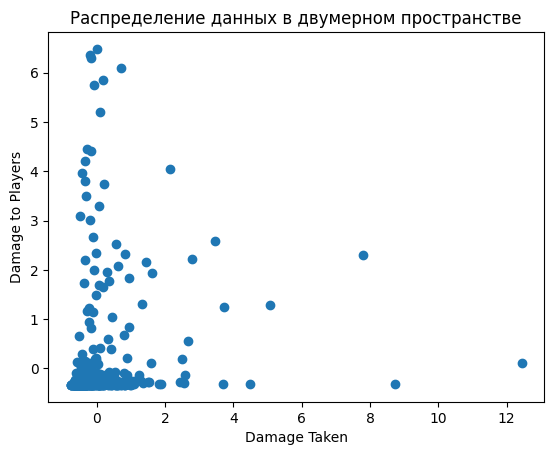

In [17]:
plt.scatter(df_cluster["video views"], df_cluster["uploads"])
plt.xlabel('Damage Taken')
plt.ylabel('Damage to Players')
plt.title('Распределение данных в двумерном пространстве')

In [18]:
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster[["video views", "uploads"]])
X

array([[12.43762585,  0.12042726],
       [ 0.88337778, -0.31706324],
       [ 8.73343516, -0.31197378],
       ...,
       [-0.66164201, -0.29989478],
       [-0.73689996, -0.33294238],
       [-0.63528647, -0.33242212]])

In [19]:
"""
Здесь визуализация кластеров k-means
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров k-means\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [20]:
# your_code here

In [21]:
from sklearn.metrics import davies_bouldin_score

scores = []

for k in range(2, 20):
  kmeans = KMeans(n_clusters=k, n_init = 10, random_state = 10)
  kmeans.fit(X)
  score = davies_bouldin_score(X, kmeans.labels_)
  scores.append(score)

final_score = scores.index(min(scores))+2

print(final_score)


19


In [22]:
from sklearn.metrics import calinski_harabasz_score

scores = []

for k in range(2, 20):
  kmeans = KMeans(n_clusters=k, n_init = 10, random_state = 10)
  kmeans.fit(X)
  score = calinski_harabasz_score(X, kmeans.labels_)
  scores.append(score)

final_score = scores.index(min(scores))+2

print(final_score)


2


In [23]:
from sklearn.metrics import silhouette_score

scores = []

for k in range(2, 20):
  kmeans = KMeans(n_clusters=k, n_init = 10, random_state = 10)
  kmeans.fit(X)
  score = silhouette_score(X, kmeans.labels_)
  scores.append(score)

final_score = scores.index(max(scores))+2

print(final_score)

3


In [24]:
# Создаем экземпляр модели K-Means
kmeans = KMeans(n_clusters=3)

# Производим кластеризацию данных
kmeans.fit(X)

# Получаем центры кластеров и прогнозируем принадлежность к кластерам
cluster_centers = kmeans.cluster_centers_
cluster_labels = kmeans.labels_
print(cluster_centers)

[[-0.11476416 -0.24071489]
 [ 0.36526167  3.40709006]
 [ 6.56787023  0.57112453]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


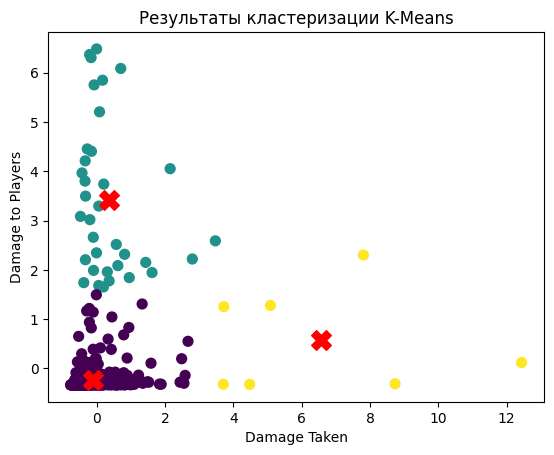

In [25]:
# Визуализируем результаты кластеризации двумерной кластеризации
plt.scatter(df_cluster['video views'], df_cluster['uploads'], c=cluster_labels, s=50, cmap='viridis')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X')
plt.xlabel('Damage Taken')
plt.ylabel('Damage to Players')
plt.title('Результаты кластеризации K-Means')
plt.show()

In [26]:
"""
Здесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?
"""

'\nЗдесь DBSCAN и метрики. Используйте поиск оптимального EPS. Объясните почему?\n'

In [27]:
# your_code here
for i, j in enumerate(X):
  print(i, j)

0 [12.43762585  0.12042726]
1 [ 0.88337778 -0.31706324]
2 [ 8.73343516 -0.31197378]
3 [7.80738749 2.3022022 ]
4 [ 4.47819171 -0.32267297]
5 [ 3.70847882 -0.32084076]
6 [ 2.59005166 -0.14047008]
7 [3.72285014 1.25243762]
8 [ 1.10191089 -0.32154197]
9 [5.08712246 1.2782921 ]
10 [ 0.44687086 -0.28222868]
11 [ 1.01298265 -0.32819221]
12 [ 0.89875741 -0.30358181]
13 [3.47458722 2.58875045]
14 [ 1.4896142  -0.26901868]
15 [ 1.88981844 -0.31950619]
16 [ 0.8995363  -0.14151059]
17 [2.80157351 2.22029573]
18 [ 0.18147458 -0.32502543]
19 [2.67456412 0.55090561]
20 [ 1.17641172 -0.22658385]
21 [ 2.5562128  -0.29966858]
22 [1.59140942 0.10696845]
23 [0.70620817 6.08512317]
24 [ 0.91048219 -0.2460143 ]
25 [ 0.80842759 -0.33029586]
26 [ 0.0920215 -0.3239623]
27 [ 1.28466906 -0.24997277]
28 [ 0.9990663  -0.32516115]
29 [ 1.00766095 -0.3207729 ]
30 [ 0.97111011 -0.32893866]
31 [ 0.63079832 -0.33049943]
32 [-0.18687153 -0.31466554]
33 [ 0.08830036 -0.28740862]
34 [ 0.03011104 -0.33235426]
35 [ 1.023433

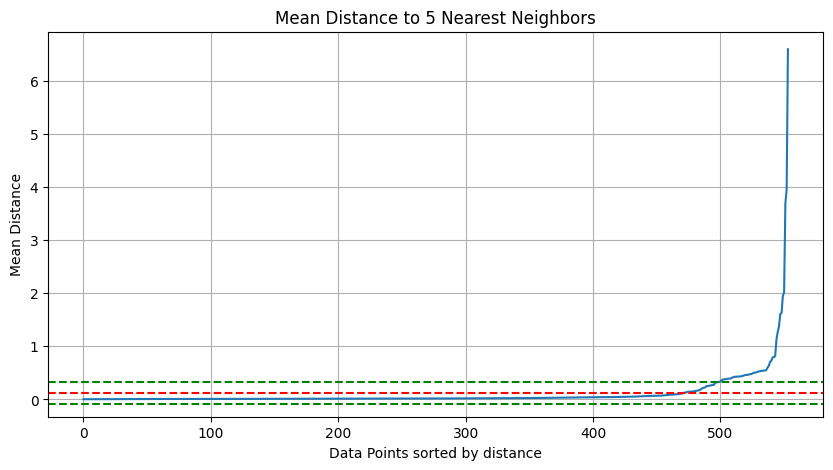

Оптимальный EPS = 0.11473125254919754


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Создаем пустой список, в который будем добавлять средние расстояния
neighbours = []

# Проходимся по каждой строке в исходном DataFrame
for i, v1 in enumerate(X):
    # Вычисляем расстояния от текущей точки до всех остальных
    distances = [np.linalg.norm(v1 - v2) for j, v2 in enumerate(X) if i != j]
    # Вычисляем среднее расстояние до 5 ближайших соседей
    neighbours.append(np.mean(sorted(distances)[:5]))

# Сортируем средние расстояния
neighbours = sorted(neighbours)

# Строим график
plt.figure(figsize=(10, 5))
plt.plot(range(len(neighbours)), neighbours)
plt.title('Mean Distance to 5 Nearest Neighbors')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Mean Distance')
plt.grid(True)

# Добавляем линиюю среднего, которая показываем примерно оптимальный EPS
plt.axhline(y=np.mean(neighbours) + np.std(neighbours) / 2, color='g', linestyle='--')
plt.axhline(y=np.mean(neighbours), color='r', linestyle='--')
plt.axhline(y=np.mean(neighbours) - np.std(neighbours) / 2, color='g', linestyle='--')

plt.show()
print(f'Оптимальный EPS = {np.mean(neighbours)}')

In [29]:
"""
Здесь визуализация кластеров DBSCAN
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров DBSCAN\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [30]:
# your_code here

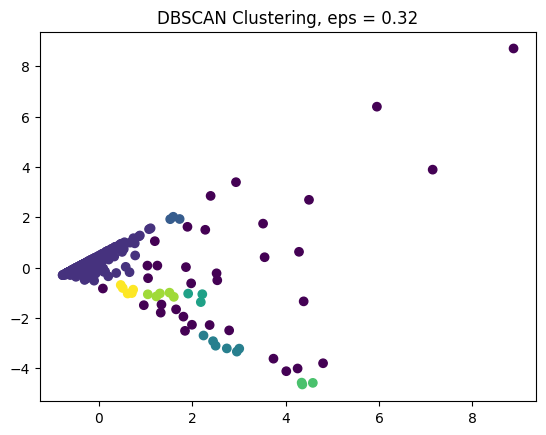

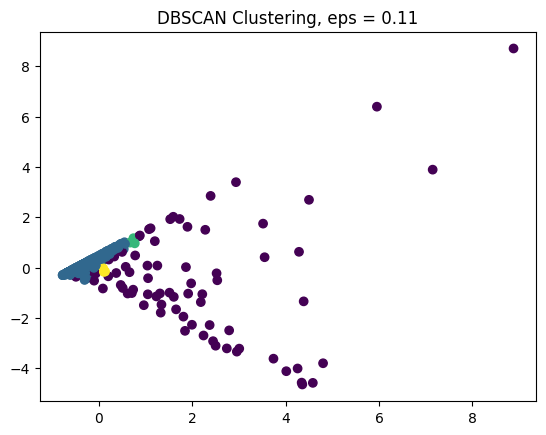

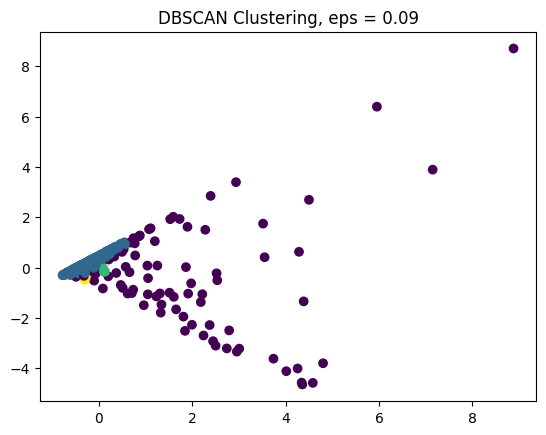

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Создаем объект PCA и снижаем размерность до 2 компонент, чтобы визуализировать на двумерном графике
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X)
#data_pca = X
for eps in [np.mean(neighbours) + np.std(neighbours) / 2, np.mean(neighbours), abs(np.mean(neighbours) - np.std(neighbours) / 2)]:
  # Инициализация и обучение модели DBSCAN
  dbscan = DBSCAN(eps=eps, min_samples=3)
  dbscan.fit(X)
  labels = dbscan.labels_

  # Визуализация результатов, темные точки - выбросы
  plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels, cmap='viridis')
  plt.title(f'DBSCAN Clustering, eps = {round(eps, 2)}')
  plt.show()

In [32]:
"""
Здесь иерархическая кластеризация и метрики
"""

'\nЗдесь иерархическая кластеризация и метрики\n'

In [33]:
# your_code here

In [34]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Инициализация и обучение модели иерархической кластеризации
agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(X)



AgglomerativeClustering(n_clusters=3)

In [35]:
"""
Здесь визуализация кластеров иерархической кластеризации
(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)
"""

'\nЗдесь визуализация кластеров иерархической кластеризации\n(Для многомерных данных используйте сжатие методами (на выбор один из) PCA/t-TSNE/umap до 2,3 точек - влияет на вид гарфика, если 2 точки - то двумерный, если три точки - то трехмерный)\n'

In [36]:
# your_code here

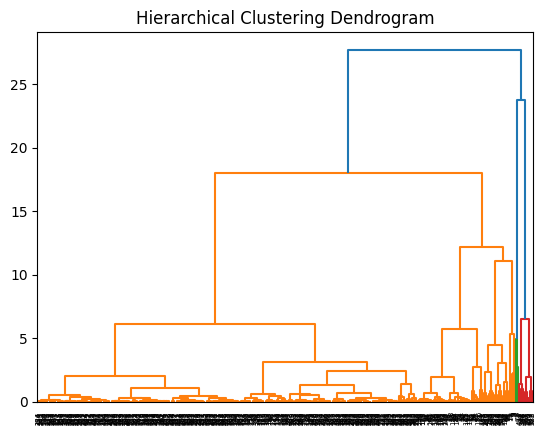

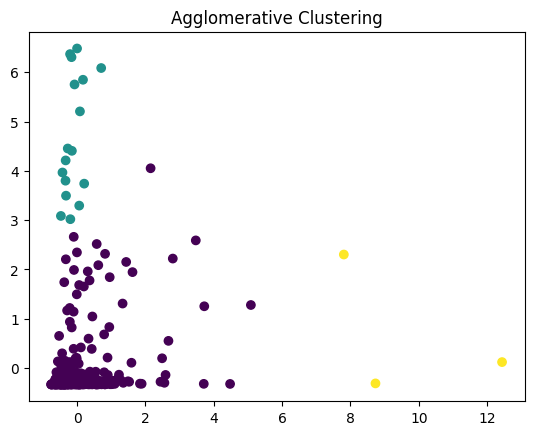

In [37]:
# Визуализация дендрограммы
from scipy.cluster import hierarchy
linkage_matrix = hierarchy.linkage(X, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Визуализация результатов кластеризации
plt.scatter(X[:, 0], X[:, 1], c=agg_clustering.labels_, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()


In [40]:
!pip install fastapi
!pip install kaleido
!pip install uvicorn
!pip install ydata-profiling

Выполните профилирование набора данных относительно кластеров, используя оригинальный набор данных.

P.S. задание для всех

In [ ]:
from ydata_profiling import ProfileReport

df_c = df.copy()
df_c['kmeans_cluster'] = kmeans.labels_
df_c['dbsscan_cluster'] = dbscan.labels_


In [ ]:

uniq_labels = tuple(set(kmeans.labels_))
print(uniq_labels)

In [ ]:
from ydata_profiling import ProfileReport


In [ ]:
for i in uniq_labels:
  if i == -1:
    continue
  temp = ProfileReport(df_c[df_c.kmeans_cluster == i])
  temp.to_file(f"KMeans_cluster{i}.html")


In [ ]:
uniq_labels = tuple(set(dbscan.labels_))
print(uniq_labels)

In [ ]:
for i in uniq_labels:
  if i == -1:
    continue
  temp = ProfileReport(df_c[df_c.dbsscan_cluster == i])
  temp.to_file(f"DBS_cluster{i}.html")


In [ ]:
#
#### Приветсвуется ручной анилиз - гарфики, статистика по разным кластерам, как альтернативный путь решения задачи
#

# 1. в оригинальный набор данных добавьте колонки с кластерами и работаем с ним

"""
df['kmeans_cluster'] = kmeans_cluster.labels_
df['dbsscan_cluster'] = dbsscan_cluster.labels_
...
"""

# 2. Выполните фильтрацию относительно каждого кластера и каждого алгоритма (Внимание, кластер -1 не учитываем в DBSSCAN, тк это выбросы. То есть, точки не вошли ни в одни кластер)
"""
P.S за пример взять 1 тип кластеров, выполните для всех (если кластеров больше 3, разрешено использовать первые три кластера для анализа)

from ydata_profiling import ProfileReport
df['dbscan_labels'] = dbscan.labels_

uniq_labels = tuple(set(dbscan.labels_))

print(uniq_labels)

"""

# 3. Выполните профилирование
"""
На отдельной ячейке выполните профилирование для каждого кластера и каждого алгоритма

from ydata_profiling import ProfileReport

ProfileReport(df[df.dbscan_labels == 0]) # фильтруем по кластерам из uniq_labels, получаем красивый результат :)

"""

# 4. Проанализируйте результат по кластерам. Какие переменные попали в каждый кластер, их различия (статистические), графики.
# Постарайтесь объяснить различия "фактически".
# Например, видно, что в кластер 1 у пациентов возраст выше в среднем и в медиане, чем в остальных, что может свидетельствоать о влиянии возраста на кластер №()



In [ ]:
# your_code here